# 1. Install necessary libraries

In [35]:
# !pip install gensim
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install torch_geometric
# !pip install networkx
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

#  2. Graph  Construction

In [16]:
import networkx as nx
import random
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

## 2.1. KarateClub

In [17]:
# Import the KarateClub dataset and select the first graph in the dataset
dataset = KarateClub()[0]

# Display the dataset
dataset

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

In [18]:
dataset.y

tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])

In [19]:
# Convert the dataset to a NetworkX graph
karate_graph = to_networkx(dataset)

# Iterate over each node in the NetworkX graph
for node in karate_graph.nodes:
    # Assign the class label from the dataset to the node's "class" attribute
    karate_graph.nodes[node]["class"] = dataset.y.tolist()[node]

In [20]:
# Retrieve all nodes in the karate_graph along with their attributes
karate_graph.nodes(data=True)

NodeDataView({0: {'class': 1}, 1: {'class': 1}, 2: {'class': 1}, 3: {'class': 1}, 4: {'class': 3}, 5: {'class': 3}, 6: {'class': 3}, 7: {'class': 1}, 8: {'class': 0}, 9: {'class': 1}, 10: {'class': 3}, 11: {'class': 1}, 12: {'class': 1}, 13: {'class': 1}, 14: {'class': 0}, 15: {'class': 0}, 16: {'class': 3}, 17: {'class': 1}, 18: {'class': 0}, 19: {'class': 1}, 20: {'class': 0}, 21: {'class': 1}, 22: {'class': 0}, 23: {'class': 0}, 24: {'class': 2}, 25: {'class': 2}, 26: {'class': 0}, 27: {'class': 0}, 28: {'class': 2}, 29: {'class': 0}, 30: {'class': 0}, 31: {'class': 2}, 32: {'class': 0}, 33: {'class': 0}})

# 3. Random Walk

In [21]:
'''
    graph : Graph
        The graph on which to perform the random walk.
    start_node : int
        The starting node of the random walk sequence.
    num_steps : int
        The length of the random walk sequence.
'''
def random_walk(graph, start_node, num_steps):
    # Initialize the result list to store the sequence of nodes visited
    result = []
    # Set the current node to the start node
    current_node = start_node
    
    # Perform the random walk for the specified number of steps
    for _ in range(num_steps):
        # Append the current node to the result list
        result.append(current_node)
        # Get the neighbors of the current node
        neighbors = list(graph.neighbors(current_node))
        
        # If the current node has no neighbors, break the loop
        if not neighbors:
            break
        
        # Randomly select the next node from the neighbors
        current_node = random.choice(neighbors)

    # Return the sequence of nodes visited during the random walk
    return result

In [22]:
# Randomly select a start node from the nodes in the karate_graph
start_node = random.choice(list(karate_graph.nodes()))

# Define the number of steps for the random walk (length of the sequence)
num_steps = 10

# Print a message indicating the start of the random walk
print("Random Walk:")

# Perform the random walk on the karate_graph starting from the start_node and for num_steps steps
result = random_walk(karate_graph, start_node, num_steps)

# Print the result of the random walk (the sequence of nodes visited)
print(result)

Random Walk:
[1, 3, 7, 1, 21, 0, 17, 1, 7, 2]


# 4. Deep Walk

In [23]:
import numpy as np
import random
from gensim.models import Word2Vec
from torch.utils.data import Dataset
from functools import partial

## 4.1. Building dataset

In [24]:
# Generate a list of 100 random walks on the karate_graph
dataset = [
    random_walk(
        karate_graph,  # The graph on which to perform the random walk
        start_node=random.choice(list(karate_graph.nodes)),  # Randomly select a start node from the graph's nodes
        num_steps=20  # Number of steps in each random walk
    ) 
    for _ in range(100)  # Repeat the process 100 times to generate 100 random walks
]

In [25]:
# Iterate over each random walk sequence in the dataset
for seq in dataset:
    # Print the current random walk sequence
    print(seq)

[15, 33, 14, 32, 15, 32, 31, 25, 31, 0, 21, 1, 13, 3, 2, 0, 5, 16, 6, 0]
[17, 1, 17, 1, 19, 0, 13, 3, 2, 8, 30, 33, 23, 33, 15, 32, 14, 32, 22, 33]
[9, 2, 9, 2, 28, 33, 23, 32, 33, 27, 23, 25, 23, 32, 15, 32, 18, 32, 20, 32]
[1, 0, 8, 0, 8, 33, 23, 25, 24, 31, 0, 19, 33, 9, 33, 8, 33, 32, 14, 32]
[28, 2, 0, 1, 21, 1, 17, 1, 17, 0, 12, 0, 7, 0, 11, 0, 10, 5, 16, 5]
[2, 28, 33, 15, 32, 31, 24, 25, 23, 29, 32, 14, 32, 14, 32, 29, 32, 33, 31, 28]
[32, 18, 33, 22, 32, 15, 32, 33, 29, 26, 29, 32, 14, 32, 15, 32, 14, 32, 22, 32]
[27, 33, 19, 0, 19, 0, 8, 30, 1, 21, 1, 2, 1, 17, 0, 12, 3, 13, 2, 32]
[23, 32, 20, 32, 2, 0, 7, 0, 3, 13, 3, 1, 19, 33, 9, 2, 3, 13, 0, 19]
[15, 33, 23, 25, 23, 33, 27, 23, 32, 29, 26, 33, 18, 33, 18, 33, 13, 1, 21, 1]
[30, 33, 19, 33, 15, 33, 31, 32, 2, 3, 12, 0, 7, 0, 13, 33, 20, 32, 30, 32]
[12, 3, 12, 0, 21, 0, 10, 4, 0, 2, 3, 12, 0, 12, 0, 8, 33, 14, 32, 14]
[18, 33, 19, 33, 20, 33, 18, 33, 29, 33, 8, 0, 21, 0, 21, 0, 13, 33, 18, 33]
[13, 33, 28, 33, 19, 0, 19, 

## 4.2. Run DeepWalk

In [26]:
# Import the Word2Vec class from the gensim library
from gensim.models import Word2Vec

# Create a Word2Vec model using the dataset of random walks
deepwalk = Word2Vec(
    dataset,        # The dataset of random walks
    vector_size=300,  # The size of the word vectors
    epochs=100       # The number of training epochs
)

In [27]:
# Retrieve the word vector for the node with index 1 from the Word2Vec model
deepwalk.wv[1]

array([-4.28042077e-02,  1.18562706e-01,  2.33856160e-02, -9.16411057e-02,
       -6.48594135e-03, -1.80745661e-01, -3.59608121e-02,  2.57204026e-01,
        7.34632313e-02, -7.11698309e-02,  1.26440614e-01, -1.44184858e-01,
       -1.24751620e-01,  1.37787819e-01, -3.50137204e-02,  1.73143987e-02,
        7.72830695e-02, -6.73723593e-02, -8.71455595e-02, -3.89006957e-02,
       -1.10568672e-01,  5.74580319e-02, -1.59772076e-02,  2.14255229e-01,
       -1.79783672e-01,  7.13987127e-02, -7.08623882e-03,  1.44568801e-01,
       -9.53725055e-02,  2.03037206e-02, -1.32281529e-02, -1.09520592e-01,
        6.31754622e-02, -2.94006970e-02, -7.09780231e-02,  1.22852184e-01,
        7.39577338e-02, -1.12287201e-01,  7.10068047e-02,  3.19490023e-02,
       -3.65500487e-02, -3.05717904e-02,  1.19634643e-02, -6.28316253e-02,
        1.82939976e-01,  6.98080212e-02, -1.16281077e-01,  3.63783687e-02,
        9.13951769e-02,  3.66724376e-03,  4.91487049e-02,  1.15507245e-02,
        2.07172204e-02,  

## 4.3. Visualize DeepWalk

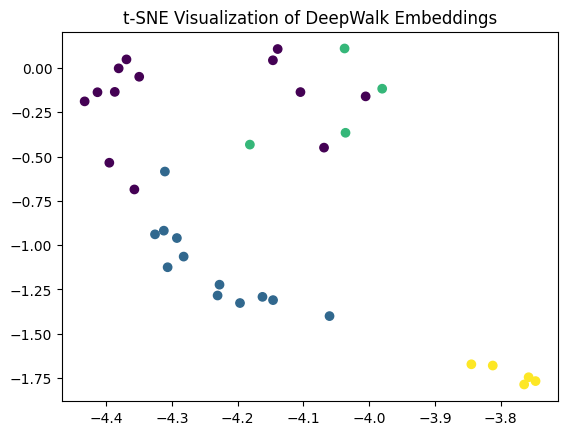

In [29]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

deepwalk_x = np.stack([deepwalk.wv[idx] for idx in range(34)])
deepwalk_y = np.stack([node[1]["class"] for node in karate_graph.nodes(data=True)])


# Perform t-SNE on the DeepWalk embeddings
tsne = TSNE(n_components=2)
tsne_deepwalk = tsne.fit_transform(deepwalk_x)

# Plot the t-SNE visualization
plt.scatter(tsne_deepwalk[:, 0], tsne_deepwalk[:, 1], c=deepwalk_y)
plt.title("t-SNE Visualization of DeepWalk Embeddings")
plt.show()

# 5. Node2Vec

## 5.1. Random Walk for Node2Vec

In [30]:
def node2vec_walk(G, start_node, num_steps, p, q):
    # Initialize the walk with the start node
    walk = [start_node]

    # Perform the walk for the specified number of steps
    for _ in range(num_steps - 1):
        # Get the current node (last node in the walk)
        current_node = walk[-1]
        # Get the neighbors of the current node
        neighbors = list(G.neighbors(current_node))

        if len(neighbors) > 0:
            # Check if the walk has just started
            if len(walk) == 1:
                next_node = random.choice(neighbors)
            else:
                # Otherwise, choose the next node based on the weighted choice
                next_node = node2vec_weighted_choice(G, current_node, walk[-2], p, q)

            # Append the chosen node to the walk
            walk.append(next_node)
        else:
            # If there are no neighbors, break the loop 
            break
    # Return the completed walk
    return walk

def node2vec_weighted_choice(G, current_node, previous_node, p, q):
    # Get the neighbors of the current node
    neighbors = list(G.neighbors(current_node))
    unnormalized_weights = []

    # Calculate unnormalized weights for each neighbor
    for neighbor in neighbors:
        if neighbor == previous_node:
            # If the neighbor is the previous node, apply the return parameter p
            unnormalized_weights.append(1.0 / p)
        elif G.has_edge(current_node, neighbor):
            # If the neighbor is connected to the current node, weight is 1
            unnormalized_weights.append(1.0)
        else:
            # Otherwise, apply the in-out parameter q
            unnormalized_weights.append(1.0 / q)

    # Normalize the weights
    norm_weights = [weight / sum(unnormalized_weights) for weight in unnormalized_weights]
    # Choose the next node based on the normalized weights
    return random.choices(neighbors, weights=norm_weights)[0]

In [42]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec

# Load the Karate Club dataset
karate_graph = nx.karate_club_graph()

# Generate a list of 100 random walks on the karate_graph
# Keep the nodes as integers while performing random walks
dataset2 = [
    [str(node) for node in node2vec_walk(  # Convert nodes to string just for Word2Vec
        karate_graph,  
        start_node=random.choice(list(karate_graph.nodes())),  # Use integer nodes
        num_steps=10,  
        p=0.8,  
        q=0.2  
    )]
    for _ in range(100)
]

# Train the Word2Vec model using the random walks generated
node2vec_model = Word2Vec(
    sentences=dataset2,    
    vector_size=200,       
    window=5,              
    min_count=1,           
    sg=1,                  
    epochs=100             
)

# Get the node embeddings learned by the Word2Vec model
# Convert node to string while accessing the embeddings
node_embeddings = np.array([node2vec_model.wv[str(node)] for node in karate_graph.nodes()])


## 5.2. Visualization

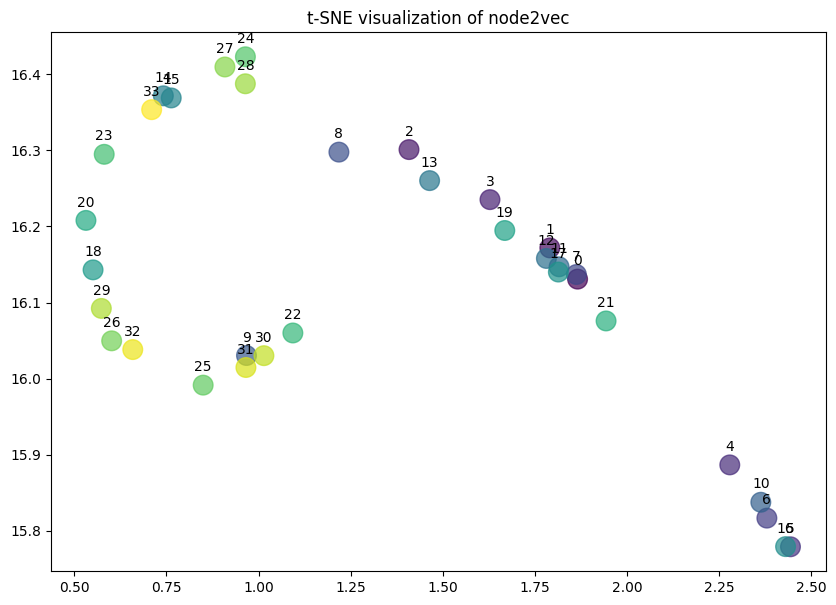

In [44]:
# Reduce dimensions using t-SNE to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
node_embeddings_2d = tsne.fit_transform(node_embeddings)

# Visualization
plt.figure(figsize=(10, 7))
plt.scatter(node_embeddings_2d[:, 0], node_embeddings_2d[:, 1], s=200, c=list(karate_graph.nodes()), cmap='viridis', alpha=0.7)

# Annotate nodes with their labels
for i, node in enumerate(karate_graph.nodes()):
    plt.annotate(str(node), (node_embeddings_2d[i, 0], node_embeddings_2d[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title("t-SNE visualization of node2vec")
plt.show()

# 6. LINE

## 6.1. Alias Sampling

In [51]:
import random
from decimal import *
import numpy as np
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt

class VoseAlias:
    def __init__(self, dist):
        """
        (VoseAlias, dict) -> NoneType
        """
        self.dist = dist
        self.alias_initialisation()

    def alias_initialisation(self):
        """
        Construct probability and alias tables for the distribution
        """
        # Initialise variables
        n = len(self.dist)
        self.table_prob = {}   # probability table
        self.table_alias = {}  # alias table
        scaled_prob = {}       # scaled probabilities
        small = []             # stack for probabilities smaller that 1
        large = []             # stack for probabilities greater than or equal to 1

        # Construct and sort the scaled probabilities into their appropriate stacks
        print("1/2. Building and sorting scaled probabilities for alias table...")
        for o, p in tqdm(self.dist.items()):
            scaled_prob[o] = Decimal(p) * n

            if scaled_prob[o] < 1:
                small.append(o)
            else:
                large.append(o)

        print("2/2. Building alias table...")
        # Construct the probability and alias tables
        while small and large:
            s = small.pop()
            l = large.pop()

            self.table_prob[s] = scaled_prob[s]
            self.table_alias[s] = l

            scaled_prob[l] = (scaled_prob[l] + scaled_prob[s]) - Decimal(1)

            if scaled_prob[l] < 1:
                small.append(l)
            else:
                large.append(l)

        # The remaining outcomes (of one stack) must have probability 1
        while large:
            self.table_prob[large.pop()] = Decimal(1)

        while small:
            self.table_prob[small.pop()] = Decimal(1)
        self.listprobs = list(self.table_prob)

    def alias_generation(self):
        """
        Yields a random outcome from the distribution.
        """
        # Determine which column of table_prob to inspect
        col = random.choice(self.listprobs)
        # Determine which outcome to pick in that column
        if self.table_prob[col] >= random.uniform(0, 1):
            return col
        else:
            return self.table_alias[col]

    def sample_n(self, size):
        """
        Yields a sample of size n from the distribution, and print the results to stdout.
        """
        for i in range(size):
            yield self.alias_generation()


def makeDist(graph: nx.Graph, power=0.75):

    edgedistdict = collections.defaultdict(int)
    nodedistdict = collections.defaultdict(int)

    weightsdict = collections.defaultdict(int)
    nodedegrees = collections.defaultdict(int)

    weightsum = 0
    negprobsum = 0

    nlines = 0

    maxindex = 0

    # Iterate over all edges in the graph
    for edge in tqdm(graph.edges(data=True), total=nlines):
        node1, node2, weight = edge[0], edge[1], edge[2]["weight"]

        edgedistdict[tuple([node1, node2])] = weight
        nodedistdict[node1] += weight

        weightsdict[tuple([node1, node2])] = weight
        nodedegrees[node1] += weight

        weightsum += weight
        negprobsum += np.power(weight, power)

        if node1 > maxindex:
            maxindex = node1
        elif node2 > maxindex:
            maxindex = node2

    # Normalize node distribution dictionary
    for node, outdegree in nodedistdict.items():
        nodedistdict[node] = np.power(outdegree, power) / negprobsum

    # Normalize edge distribution dictionary
    for edge, weight in edgedistdict.items():
        edgedistdict[edge] = weight / weightsum

    return edgedistdict, nodedistdict, weightsdict, nodedegrees, maxindex


def negSampleBatch(sourcenode, targetnode, negsamplesize, weights,
                   nodedegrees, nodesaliassampler, t=10e-3):
    """
    For generating negative samples.
    """
    negsamples = 0
    while negsamples < negsamplesize:
        samplednode = nodesaliassampler.sample_n(1)
        if (samplednode == sourcenode) or (samplednode == targetnode):
            continue
        else:
            negsamples += 1
            yield samplednode


def makeData(samplededges, negsamplesize, weights, nodedegrees, nodesaliassampler):
    for e in samplededges:
        sourcenode, targetnode = e[0], e[1]
        negnodes = []
        for negsample in negSampleBatch(sourcenode, targetnode, negsamplesize,
                                        weights, nodedegrees, nodesaliassampler):
            for node in negsample:
                negnodes.append(node)
        yield [e[0], e[1]] + negnodes

## 6.2. LINE Model

In [52]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class LINE(nn.Module):
    def __init__(self, size, embed_dim=128, order=1):
        super(LINE, self).__init__()

        # Ensure the order is either 1 or 2
        assert order in [1, 2], print("Order should either be int(1) or int(2)")

        # Set embedding dimension and order
        self.embed_dim = embed_dim
        self.order = order

        # Initialize node embeddings
        self.nodes_embeddings = nn.Embedding(size, embed_dim)
        
        # If order is 2, initialize context node embeddings
        if order == 2:
            self.contextnodes_embeddings = nn.Embedding(size, embed_dim)
            # Initialize context node embeddings with uniform distribution
            self.contextnodes_embeddings.weight.data = self.contextnodes_embeddings.weight.data.uniform_(-.5, .5) / embed_dim

        # Initialize node embeddings with uniform distribution
        self.nodes_embeddings.weight.data = self.nodes_embeddings.weight.data.uniform_(-.5, .5) / embed_dim

    def forward(self, v_i, v_j, negsamples, device):
        # Get embeddings for input nodes and move to the specified device
        v_i = self.nodes_embeddings(v_i).to(device)

        # If order is 2, use context node embeddings for v_j and negative samples
        if self.order == 2:
            v_j = self.contextnodes_embeddings(v_j).to(device)
            negativenodes = -self.contextnodes_embeddings(negsamples).to(device)

        else:
            # Otherwise, use node embeddings for v_j and negative samples
            v_j = self.nodes_embeddings(v_j).to(device)
            negativenodes = -self.nodes_embeddings(negsamples).to(device)

        # Compute the positive batch by element-wise multiplication and log-sigmoid
        mulpositivebatch = torch.mul(v_i, v_j)
        positivebatch = F.logsigmoid(torch.sum(mulpositivebatch, dim=1))

        # Compute the negative batch by element-wise multiplication and log-sigmoid
        mulnegativebatch = torch.mul(v_i.view(len(v_i), 1, self.embed_dim), negativenodes)
        negativebatch = torch.sum(
            F.logsigmoid(
                torch.sum(mulnegativebatch, dim=2)
            ),
            dim=1)
        
        # Compute the loss as the sum of positive and negative batches
        loss = positivebatch + negativebatch
        # Return the mean negative loss        
        return -torch.mean(loss)

In [53]:
# Iterate over all edges in the karate_graph
for edge in karate_graph.edges():
    # Set the weight of each edge to 1
    karate_graph.edges[edge]["weight"] = 1

In [54]:
from tqdm import trange
import torch
import torch.optim as optim

# Define training parameters
args = {
    "epochs": 100,
    "order": 2,
    "num_neg": 5,
    "dim": 128,
    "batch_size": 10,
    "lr": 0.025,
    "neg_power": 0.75
}
# Create dict of distribution when opening file
edgedistdict, nodedistdict, weights, nodedegrees, maxindex = makeDist(karate_graph, args["neg_power"])

# Initialize VoseAlias samplers for edges and nodes
edgesaliassampler = VoseAlias(edgedistdict)
nodesaliassampler = VoseAlias(nodedistdict)

# Calculate the number of batches per epoch
batchrange = int(len(edgedistdict) / args["batch_size"])
print(maxindex)

# Initialize the LINE model
line = LINE(maxindex + 1, embed_dim=args["dim"], order=args["order"])

# Set up the optimizer with Stochastic Gradient Descent (SGD)
opt = optim.SGD(line.parameters(), lr=args["lr"], momentum=0.9, nesterov=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize a dictionary to store loss data
lossdata = {"it": [], "loss": []}
it = 0

print("\nTraining on {}\n".format(device))

# Training loop
for epoch in range(args["epochs"]):
    for b in trange(batchrange, desc=f"Epoch {epoch}"):
        # Sample a batch of edges
        samplededges = edgesaliassampler.sample_n(args["batch_size"])

        # Generate training data from sampled edges
        batch = list(makeData(samplededges, args["num_neg"], weights, nodedegrees, nodesaliassampler))
        batch = torch.LongTensor(batch)

        # Separate the batch into input nodes, context nodes, and negative samples
        v_i = batch[:, 0]
        v_j = batch[:, 1]
        negsamples = batch[:, 2:]

        # Zero the gradients
        line.zero_grad()

        # Compute the loss
        loss = line(v_i, v_j, negsamples, device)
        
        # Backpropagate the loss
        loss.backward()

        # Update the model parameters
        opt.step()

        # Store the loss and iteration number
        lossdata["loss"].append(loss.item())
        lossdata["it"].append(it)
        it += 1

78it [00:00, 81829.84it/s]


1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 78/78 [00:00<00:00, 323596.15it/s]


2/2. Building alias table...
1/2. Building and sorting scaled probabilities for alias table...


100%|██████████| 26/26 [00:00<00:00, 213827.26it/s]


2/2. Building alias table...
33

Training on cuda



Epoch 99: 100%|██████████| 7/7 [00:00<00:00, 1168.56it/s]


## 6.3. Visualization

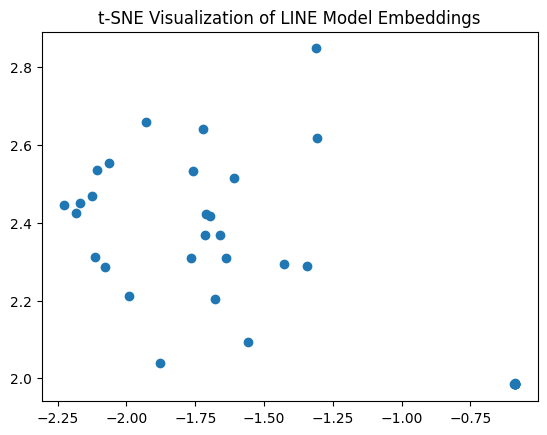

In [55]:
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Get the node embeddings learned by the LINE model
node_embeddings = line.nodes_embeddings.weight.data.cpu().numpy()

# Perform t-SNE on the node embeddings
tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = tsne.fit_transform(node_embeddings)

# Plot the t-SNE visualization
plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1])
plt.title("t-SNE Visualization of LINE Model Embeddings")
plt.show()

# 7. Metapath2Vec

In [1]:
from torch_geometric.datasets.aminer import AMiner

# Load the AMiner dataset from the specified directory.
# The dataset will be downloaded if it is not already present in the directory.
aminer_data = AMiner("./")[0]

# Display the first graph object in the AMiner dataset.
# This object contains the graph structure and node/edge features.
aminer_data

HeteroData(
  author={
    y=[246678],
    y_index=[246678],
    num_nodes=1693531,
  },
  venue={
    y=[134],
    y_index=[134],
    num_nodes=3883,
  },
  paper={ num_nodes=3194405 },
  (paper, written_by, author)={ edge_index=[2, 9323605] },
  (author, writes, paper)={ edge_index=[2, 9323605] },
  (paper, published_in, venue)={ edge_index=[2, 3194405] },
  (venue, publishes, paper)={ edge_index=[2, 3194405] }
)

In [56]:
from torch_geometric.nn.models import MetaPath2Vec
import torch

# Define the metapath schema for the heterogeneous graph
metapath = [
    ('author', 'writes', 'paper'),
    ('paper', 'published_in', 'venue'),
    ('venue', 'publishes', 'paper'),
    ('paper', 'written_by', 'author'),
]

# Set the device to GPU if available, otherwise use CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Initialize the MetaPath2Vec model with the specified parameters
model = MetaPath2Vec(
    aminer_data.edge_index_dict,  # Edge index dictionary from the AMiner dataset
    embedding_dim=128,            # Dimension of the embedding vectors
    metapath=metapath,            # Metapath schema
    walk_length=50,               # Length of each random walk
    context_size=7,               # Size of the context window
    walks_per_node=5,             # Number of walks per node
    num_negative_samples=5,       # Number of negative samples for negative sampling
    sparse=True                   # Use sparse gradients for optimization
).to(device)                      # Move the model to the specified device

# Create a data loader for generating batches of random walks
loader = model.loader(
    batch_size=128,  # Number of walks per batch
    shuffle=True,    # Shuffle the walks at each epoch
    num_workers=6    # Number of worker threads for data loading
)

# Set up the optimizer using SparseAdam for sparse gradients
optimizer = torch.optim.SparseAdam(
    list(model.parameters()),  # Model parameters to optimize
    lr=0.01                    # Learning rate
)

In [5]:
def train(epoch, log_steps=100, eval_steps=2000):
    '''
    :param log_steps: the value of step for log 
    :param eval_steps: the value of step for evaluation
    :return: 
    '''
    # Set the model to training mode
    model.train()

    total_loss = 0
    for i, (pos_rw, neg_rw) in enumerate(loader):
        # Zero the gradients for the optimizer
        optimizer.zero_grad()
        # Move positive and negative random walks to the GPU
        pos_rw = pos_rw.to(device)
        neg_rw = neg_rw.to(device)
        # Compute the loss using the model's loss function
        loss = model.loss(pos_rw, neg_rw)
        # Backpropagate the loss
        loss.backward()
        # Update the model parameters
        optimizer.step()

        # Accumulate the total loss
        total_loss += loss.item()
        # Log the loss at specified intervals
        if (i + 1) % log_steps == 0:
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Loss: {total_loss / log_steps:.4f}'))
            total_loss = 0

        # Evaluate the model at specified intervals
        if (i + 1) % eval_steps == 0:
            acc = test()
            print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                   f'Acc: {acc:.4f}'))


@torch.no_grad()
def test(train_ratio=0.1):
    # Set the model to evaluation mode
    model.eval()

    # Move data to GPU and get the embeddings for 'author' nodes
    z = model('author', batch=aminer_data['author'].y_index.to(device))
    y = aminer_data['author'].y.to(device)

    # Generate a random permutation of the indices
    perm = torch.randperm(z.size(0), device=device)
    # Split the indices into training and testing sets
    train_perm = perm[:int(z.size(0) * train_ratio)]
    test_perm = perm[int(z.size(0) * train_ratio):]

    # Test the model using the training and testing sets
    return model.test(z[train_perm], y[train_perm], z[test_perm], y[test_perm],
                      max_iter=150)

In [6]:
for epoch in range(5):
    train(epoch)
    acc = test()
    print(f'Epoch: {epoch}, Accuracy: {acc:.4f}')

Epoch: 0, Step: 00100/13231, Loss: 9.1038
Epoch: 0, Step: 00200/13231, Loss: 7.5650
Epoch: 0, Step: 00300/13231, Loss: 6.4600
Epoch: 0, Step: 00400/13231, Loss: 5.8501
Epoch: 0, Step: 00500/13231, Loss: 5.5913
Epoch: 0, Step: 00600/13231, Loss: 5.4350
Epoch: 0, Step: 00700/13231, Loss: 5.2979
Epoch: 0, Step: 00800/13231, Loss: 5.1691
Epoch: 0, Step: 00900/13231, Loss: 5.0447
Epoch: 0, Step: 01000/13231, Loss: 4.9273
Epoch: 0, Step: 01100/13231, Loss: 4.8106
Epoch: 0, Step: 01200/13231, Loss: 4.7034
Epoch: 0, Step: 01300/13231, Loss: 4.5945
Epoch: 0, Step: 01400/13231, Loss: 4.4956
Epoch: 0, Step: 01500/13231, Loss: 4.3941
Epoch: 0, Step: 01600/13231, Loss: 4.2977
Epoch: 0, Step: 01700/13231, Loss: 4.2026
Epoch: 0, Step: 01800/13231, Loss: 4.1125
Epoch: 0, Step: 01900/13231, Loss: 4.0238
Epoch: 0, Step: 02000/13231, Loss: 3.9379


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 02000/13231, Acc: 0.2888
Epoch: 0, Step: 02100/13231, Loss: 3.8505
Epoch: 0, Step: 02200/13231, Loss: 3.7700
Epoch: 0, Step: 02300/13231, Loss: 3.6898
Epoch: 0, Step: 02400/13231, Loss: 3.6136
Epoch: 0, Step: 02500/13231, Loss: 3.5353
Epoch: 0, Step: 02600/13231, Loss: 3.4610
Epoch: 0, Step: 02700/13231, Loss: 3.3881
Epoch: 0, Step: 02800/13231, Loss: 3.3172
Epoch: 0, Step: 02900/13231, Loss: 3.2501
Epoch: 0, Step: 03000/13231, Loss: 3.1835
Epoch: 0, Step: 03100/13231, Loss: 3.1188
Epoch: 0, Step: 03200/13231, Loss: 3.0550
Epoch: 0, Step: 03300/13231, Loss: 2.9935
Epoch: 0, Step: 03400/13231, Loss: 2.9361
Epoch: 0, Step: 03500/13231, Loss: 2.8777
Epoch: 0, Step: 03600/13231, Loss: 2.8225
Epoch: 0, Step: 03700/13231, Loss: 2.7689
Epoch: 0, Step: 03800/13231, Loss: 2.7154
Epoch: 0, Step: 03900/13231, Loss: 2.6650
Epoch: 0, Step: 04000/13231, Loss: 2.6171


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 04000/13231, Acc: 0.4659
Epoch: 0, Step: 04100/13231, Loss: 2.5691
Epoch: 0, Step: 04200/13231, Loss: 2.5215
Epoch: 0, Step: 04300/13231, Loss: 2.4772
Epoch: 0, Step: 04400/13231, Loss: 2.4349
Epoch: 0, Step: 04500/13231, Loss: 2.3924
Epoch: 0, Step: 04600/13231, Loss: 2.3530
Epoch: 0, Step: 04700/13231, Loss: 2.3162
Epoch: 0, Step: 04800/13231, Loss: 2.2767
Epoch: 0, Step: 04900/13231, Loss: 2.2413
Epoch: 0, Step: 05000/13231, Loss: 2.2061
Epoch: 0, Step: 05100/13231, Loss: 2.1732
Epoch: 0, Step: 05200/13231, Loss: 2.1392
Epoch: 0, Step: 05300/13231, Loss: 2.1091
Epoch: 0, Step: 05400/13231, Loss: 2.0793
Epoch: 0, Step: 05500/13231, Loss: 2.0480
Epoch: 0, Step: 05600/13231, Loss: 2.0191
Epoch: 0, Step: 05700/13231, Loss: 1.9924
Epoch: 0, Step: 05800/13231, Loss: 1.9659
Epoch: 0, Step: 05900/13231, Loss: 1.9410
Epoch: 0, Step: 06000/13231, Loss: 1.9146


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 06000/13231, Acc: 0.6404
Epoch: 0, Step: 06100/13231, Loss: 1.8925
Epoch: 0, Step: 06200/13231, Loss: 1.8687
Epoch: 0, Step: 06300/13231, Loss: 1.8473
Epoch: 0, Step: 06400/13231, Loss: 1.8245
Epoch: 0, Step: 06500/13231, Loss: 1.8036
Epoch: 0, Step: 06600/13231, Loss: 1.7837
Epoch: 0, Step: 06700/13231, Loss: 1.7642
Epoch: 0, Step: 06800/13231, Loss: 1.7448
Epoch: 0, Step: 06900/13231, Loss: 1.7267
Epoch: 0, Step: 07000/13231, Loss: 1.7076
Epoch: 0, Step: 07100/13231, Loss: 1.6908
Epoch: 0, Step: 07200/13231, Loss: 1.6747
Epoch: 0, Step: 07300/13231, Loss: 1.6579
Epoch: 0, Step: 07400/13231, Loss: 1.6422
Epoch: 0, Step: 07500/13231, Loss: 1.6270
Epoch: 0, Step: 07600/13231, Loss: 1.6111
Epoch: 0, Step: 07700/13231, Loss: 1.5962
Epoch: 0, Step: 07800/13231, Loss: 1.5839
Epoch: 0, Step: 07900/13231, Loss: 1.5694
Epoch: 0, Step: 08000/13231, Loss: 1.5555


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 08000/13231, Acc: 0.7397
Epoch: 0, Step: 08100/13231, Loss: 1.5423
Epoch: 0, Step: 08200/13231, Loss: 1.5303
Epoch: 0, Step: 08300/13231, Loss: 1.5183
Epoch: 0, Step: 08400/13231, Loss: 1.5062
Epoch: 0, Step: 08500/13231, Loss: 1.4945
Epoch: 0, Step: 08600/13231, Loss: 1.4828
Epoch: 0, Step: 08700/13231, Loss: 1.4706
Epoch: 0, Step: 08800/13231, Loss: 1.4598
Epoch: 0, Step: 08900/13231, Loss: 1.4496
Epoch: 0, Step: 09000/13231, Loss: 1.4395
Epoch: 0, Step: 09100/13231, Loss: 1.4296
Epoch: 0, Step: 09200/13231, Loss: 1.4196
Epoch: 0, Step: 09300/13231, Loss: 1.4102
Epoch: 0, Step: 09400/13231, Loss: 1.3998
Epoch: 0, Step: 09500/13231, Loss: 1.3915
Epoch: 0, Step: 09600/13231, Loss: 1.3826
Epoch: 0, Step: 09700/13231, Loss: 1.3738
Epoch: 0, Step: 09800/13231, Loss: 1.3646
Epoch: 0, Step: 09900/13231, Loss: 1.3560
Epoch: 0, Step: 10000/13231, Loss: 1.3481


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 10000/13231, Acc: 0.7937
Epoch: 0, Step: 10100/13231, Loss: 1.3397
Epoch: 0, Step: 10200/13231, Loss: 1.3320
Epoch: 0, Step: 10300/13231, Loss: 1.3249
Epoch: 0, Step: 10400/13231, Loss: 1.3166
Epoch: 0, Step: 10500/13231, Loss: 1.3095
Epoch: 0, Step: 10600/13231, Loss: 1.3022
Epoch: 0, Step: 10700/13231, Loss: 1.2951
Epoch: 0, Step: 10800/13231, Loss: 1.2881
Epoch: 0, Step: 10900/13231, Loss: 1.2808
Epoch: 0, Step: 11000/13231, Loss: 1.2742
Epoch: 0, Step: 11100/13231, Loss: 1.2677
Epoch: 0, Step: 11200/13231, Loss: 1.2613
Epoch: 0, Step: 11300/13231, Loss: 1.2550
Epoch: 0, Step: 11400/13231, Loss: 1.2484
Epoch: 0, Step: 11500/13231, Loss: 1.2431
Epoch: 0, Step: 11600/13231, Loss: 1.2369
Epoch: 0, Step: 11700/13231, Loss: 1.2307
Epoch: 0, Step: 11800/13231, Loss: 1.2252
Epoch: 0, Step: 11900/13231, Loss: 1.2197
Epoch: 0, Step: 12000/13231, Loss: 1.2141


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Step: 12000/13231, Acc: 0.8220
Epoch: 0, Step: 12100/13231, Loss: 1.2082
Epoch: 0, Step: 12200/13231, Loss: 1.2033
Epoch: 0, Step: 12300/13231, Loss: 1.1973
Epoch: 0, Step: 12400/13231, Loss: 1.1932
Epoch: 0, Step: 12500/13231, Loss: 1.1881
Epoch: 0, Step: 12600/13231, Loss: 1.1822
Epoch: 0, Step: 12700/13231, Loss: 1.1781
Epoch: 0, Step: 12800/13231, Loss: 1.1731
Epoch: 0, Step: 12900/13231, Loss: 1.1681
Epoch: 0, Step: 13000/13231, Loss: 1.1640
Epoch: 0, Step: 13100/13231, Loss: 1.1594
Epoch: 0, Step: 13200/13231, Loss: 1.1552


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 0, Accuracy: 0.8366
Epoch: 1, Step: 00100/13231, Loss: 1.1485
Epoch: 1, Step: 00200/13231, Loss: 1.1440
Epoch: 1, Step: 00300/13231, Loss: 1.1402
Epoch: 1, Step: 00400/13231, Loss: 1.1359
Epoch: 1, Step: 00500/13231, Loss: 1.1325
Epoch: 1, Step: 00600/13231, Loss: 1.1282
Epoch: 1, Step: 00700/13231, Loss: 1.1238
Epoch: 1, Step: 00800/13231, Loss: 1.1201
Epoch: 1, Step: 00900/13231, Loss: 1.1164
Epoch: 1, Step: 01000/13231, Loss: 1.1127
Epoch: 1, Step: 01100/13231, Loss: 1.1093
Epoch: 1, Step: 01200/13231, Loss: 1.1057
Epoch: 1, Step: 01300/13231, Loss: 1.1021
Epoch: 1, Step: 01400/13231, Loss: 1.0988
Epoch: 1, Step: 01500/13231, Loss: 1.0947
Epoch: 1, Step: 01600/13231, Loss: 1.0916
Epoch: 1, Step: 01700/13231, Loss: 1.0884
Epoch: 1, Step: 01800/13231, Loss: 1.0850
Epoch: 1, Step: 01900/13231, Loss: 1.0812
Epoch: 1, Step: 02000/13231, Loss: 1.0791


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 02000/13231, Acc: 0.8513
Epoch: 1, Step: 02100/13231, Loss: 1.0756
Epoch: 1, Step: 02200/13231, Loss: 1.0726
Epoch: 1, Step: 02300/13231, Loss: 1.0697
Epoch: 1, Step: 02400/13231, Loss: 1.0670
Epoch: 1, Step: 02500/13231, Loss: 1.0637
Epoch: 1, Step: 02600/13231, Loss: 1.0614
Epoch: 1, Step: 02700/13231, Loss: 1.0581
Epoch: 1, Step: 02800/13231, Loss: 1.0549
Epoch: 1, Step: 02900/13231, Loss: 1.0526
Epoch: 1, Step: 03000/13231, Loss: 1.0502
Epoch: 1, Step: 03100/13231, Loss: 1.0475
Epoch: 1, Step: 03200/13231, Loss: 1.0444
Epoch: 1, Step: 03300/13231, Loss: 1.0419
Epoch: 1, Step: 03400/13231, Loss: 1.0397
Epoch: 1, Step: 03500/13231, Loss: 1.0372
Epoch: 1, Step: 03600/13231, Loss: 1.0350
Epoch: 1, Step: 03700/13231, Loss: 1.0323
Epoch: 1, Step: 03800/13231, Loss: 1.0301
Epoch: 1, Step: 03900/13231, Loss: 1.0274
Epoch: 1, Step: 04000/13231, Loss: 1.0254


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 04000/13231, Acc: 0.8638
Epoch: 1, Step: 04100/13231, Loss: 1.0231
Epoch: 1, Step: 04200/13231, Loss: 1.0205
Epoch: 1, Step: 04300/13231, Loss: 1.0184
Epoch: 1, Step: 04400/13231, Loss: 1.0167
Epoch: 1, Step: 04500/13231, Loss: 1.0140
Epoch: 1, Step: 04600/13231, Loss: 1.0127
Epoch: 1, Step: 04700/13231, Loss: 1.0097
Epoch: 1, Step: 04800/13231, Loss: 1.0079
Epoch: 1, Step: 04900/13231, Loss: 1.0058
Epoch: 1, Step: 05000/13231, Loss: 1.0037
Epoch: 1, Step: 05100/13231, Loss: 1.0017
Epoch: 1, Step: 05200/13231, Loss: 0.9999
Epoch: 1, Step: 05300/13231, Loss: 0.9983
Epoch: 1, Step: 05400/13231, Loss: 0.9961
Epoch: 1, Step: 05500/13231, Loss: 0.9942
Epoch: 1, Step: 05600/13231, Loss: 0.9927
Epoch: 1, Step: 05700/13231, Loss: 0.9909
Epoch: 1, Step: 05800/13231, Loss: 0.9888
Epoch: 1, Step: 05900/13231, Loss: 0.9867
Epoch: 1, Step: 06000/13231, Loss: 0.9855


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 06000/13231, Acc: 0.8715
Epoch: 1, Step: 06100/13231, Loss: 0.9838
Epoch: 1, Step: 06200/13231, Loss: 0.9821
Epoch: 1, Step: 06300/13231, Loss: 0.9804
Epoch: 1, Step: 06400/13231, Loss: 0.9790
Epoch: 1, Step: 06500/13231, Loss: 0.9769
Epoch: 1, Step: 06600/13231, Loss: 0.9757
Epoch: 1, Step: 06700/13231, Loss: 0.9740
Epoch: 1, Step: 06800/13231, Loss: 0.9726
Epoch: 1, Step: 06900/13231, Loss: 0.9712
Epoch: 1, Step: 07000/13231, Loss: 0.9696
Epoch: 1, Step: 07100/13231, Loss: 0.9683
Epoch: 1, Step: 07200/13231, Loss: 0.9667
Epoch: 1, Step: 07300/13231, Loss: 0.9651
Epoch: 1, Step: 07400/13231, Loss: 0.9637
Epoch: 1, Step: 07500/13231, Loss: 0.9624
Epoch: 1, Step: 07600/13231, Loss: 0.9609
Epoch: 1, Step: 07700/13231, Loss: 0.9597
Epoch: 1, Step: 07800/13231, Loss: 0.9586
Epoch: 1, Step: 07900/13231, Loss: 0.9572
Epoch: 1, Step: 08000/13231, Loss: 0.9553


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 08000/13231, Acc: 0.8800
Epoch: 1, Step: 08100/13231, Loss: 0.9546
Epoch: 1, Step: 08200/13231, Loss: 0.9531
Epoch: 1, Step: 08300/13231, Loss: 0.9517
Epoch: 1, Step: 08400/13231, Loss: 0.9503
Epoch: 1, Step: 08500/13231, Loss: 0.9498
Epoch: 1, Step: 08600/13231, Loss: 0.9480
Epoch: 1, Step: 08700/13231, Loss: 0.9470
Epoch: 1, Step: 08800/13231, Loss: 0.9458
Epoch: 1, Step: 08900/13231, Loss: 0.9449
Epoch: 1, Step: 09000/13231, Loss: 0.9432
Epoch: 1, Step: 09100/13231, Loss: 0.9425
Epoch: 1, Step: 09200/13231, Loss: 0.9415
Epoch: 1, Step: 09300/13231, Loss: 0.9399
Epoch: 1, Step: 09400/13231, Loss: 0.9392
Epoch: 1, Step: 09500/13231, Loss: 0.9380
Epoch: 1, Step: 09600/13231, Loss: 0.9373
Epoch: 1, Step: 09700/13231, Loss: 0.9359
Epoch: 1, Step: 09800/13231, Loss: 0.9351
Epoch: 1, Step: 09900/13231, Loss: 0.9342
Epoch: 1, Step: 10000/13231, Loss: 0.9334


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 10000/13231, Acc: 0.8837
Epoch: 1, Step: 10100/13231, Loss: 0.9317
Epoch: 1, Step: 10200/13231, Loss: 0.9305
Epoch: 1, Step: 10300/13231, Loss: 0.9301
Epoch: 1, Step: 10400/13231, Loss: 0.9290
Epoch: 1, Step: 10500/13231, Loss: 0.9278
Epoch: 1, Step: 10600/13231, Loss: 0.9271
Epoch: 1, Step: 10700/13231, Loss: 0.9261
Epoch: 1, Step: 10800/13231, Loss: 0.9251
Epoch: 1, Step: 10900/13231, Loss: 0.9246
Epoch: 1, Step: 11000/13231, Loss: 0.9236
Epoch: 1, Step: 11100/13231, Loss: 0.9227
Epoch: 1, Step: 11200/13231, Loss: 0.9220
Epoch: 1, Step: 11300/13231, Loss: 0.9207
Epoch: 1, Step: 11400/13231, Loss: 0.9201
Epoch: 1, Step: 11500/13231, Loss: 0.9191
Epoch: 1, Step: 11600/13231, Loss: 0.9188
Epoch: 1, Step: 11700/13231, Loss: 0.9177
Epoch: 1, Step: 11800/13231, Loss: 0.9168
Epoch: 1, Step: 11900/13231, Loss: 0.9161
Epoch: 1, Step: 12000/13231, Loss: 0.9153


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Step: 12000/13231, Acc: 0.8882
Epoch: 1, Step: 12100/13231, Loss: 0.9149
Epoch: 1, Step: 12200/13231, Loss: 0.9137
Epoch: 1, Step: 12300/13231, Loss: 0.9132
Epoch: 1, Step: 12400/13231, Loss: 0.9125
Epoch: 1, Step: 12500/13231, Loss: 0.9119
Epoch: 1, Step: 12600/13231, Loss: 0.9107
Epoch: 1, Step: 12700/13231, Loss: 0.9098
Epoch: 1, Step: 12800/13231, Loss: 0.9094
Epoch: 1, Step: 12900/13231, Loss: 0.9085
Epoch: 1, Step: 13000/13231, Loss: 0.9083
Epoch: 1, Step: 13100/13231, Loss: 0.9073
Epoch: 1, Step: 13200/13231, Loss: 0.9064


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 1, Accuracy: 0.8906
Epoch: 2, Step: 00100/13231, Loss: 0.9054
Epoch: 2, Step: 00200/13231, Loss: 0.9045
Epoch: 2, Step: 00300/13231, Loss: 0.9041
Epoch: 2, Step: 00400/13231, Loss: 0.9035
Epoch: 2, Step: 00500/13231, Loss: 0.9031
Epoch: 2, Step: 00600/13231, Loss: 0.9023
Epoch: 2, Step: 00700/13231, Loss: 0.9014
Epoch: 2, Step: 00800/13231, Loss: 0.9013
Epoch: 2, Step: 00900/13231, Loss: 0.9001
Epoch: 2, Step: 01000/13231, Loss: 0.8995
Epoch: 2, Step: 01100/13231, Loss: 0.8994
Epoch: 2, Step: 01200/13231, Loss: 0.8987
Epoch: 2, Step: 01300/13231, Loss: 0.8979
Epoch: 2, Step: 01400/13231, Loss: 0.8973
Epoch: 2, Step: 01500/13231, Loss: 0.8969
Epoch: 2, Step: 01600/13231, Loss: 0.8965
Epoch: 2, Step: 01700/13231, Loss: 0.8958
Epoch: 2, Step: 01800/13231, Loss: 0.8953
Epoch: 2, Step: 01900/13231, Loss: 0.8950
Epoch: 2, Step: 02000/13231, Loss: 0.8941


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 02000/13231, Acc: 0.8944
Epoch: 2, Step: 02100/13231, Loss: 0.8935
Epoch: 2, Step: 02200/13231, Loss: 0.8931
Epoch: 2, Step: 02300/13231, Loss: 0.8925
Epoch: 2, Step: 02400/13231, Loss: 0.8919
Epoch: 2, Step: 02500/13231, Loss: 0.8918
Epoch: 2, Step: 02600/13231, Loss: 0.8910
Epoch: 2, Step: 02700/13231, Loss: 0.8905
Epoch: 2, Step: 02800/13231, Loss: 0.8901
Epoch: 2, Step: 02900/13231, Loss: 0.8897
Epoch: 2, Step: 03000/13231, Loss: 0.8895
Epoch: 2, Step: 03100/13231, Loss: 0.8890
Epoch: 2, Step: 03200/13231, Loss: 0.8882
Epoch: 2, Step: 03300/13231, Loss: 0.8878
Epoch: 2, Step: 03400/13231, Loss: 0.8874
Epoch: 2, Step: 03500/13231, Loss: 0.8870
Epoch: 2, Step: 03600/13231, Loss: 0.8867
Epoch: 2, Step: 03700/13231, Loss: 0.8861
Epoch: 2, Step: 03800/13231, Loss: 0.8859
Epoch: 2, Step: 03900/13231, Loss: 0.8850
Epoch: 2, Step: 04000/13231, Loss: 0.8843


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 04000/13231, Acc: 0.8961
Epoch: 2, Step: 04100/13231, Loss: 0.8844
Epoch: 2, Step: 04200/13231, Loss: 0.8839
Epoch: 2, Step: 04300/13231, Loss: 0.8832
Epoch: 2, Step: 04400/13231, Loss: 0.8829
Epoch: 2, Step: 04500/13231, Loss: 0.8822
Epoch: 2, Step: 04600/13231, Loss: 0.8820
Epoch: 2, Step: 04700/13231, Loss: 0.8817
Epoch: 2, Step: 04800/13231, Loss: 0.8813
Epoch: 2, Step: 04900/13231, Loss: 0.8809
Epoch: 2, Step: 05000/13231, Loss: 0.8809
Epoch: 2, Step: 05100/13231, Loss: 0.8801
Epoch: 2, Step: 05200/13231, Loss: 0.8797
Epoch: 2, Step: 05300/13231, Loss: 0.8793
Epoch: 2, Step: 05400/13231, Loss: 0.8787
Epoch: 2, Step: 05500/13231, Loss: 0.8789
Epoch: 2, Step: 05600/13231, Loss: 0.8783
Epoch: 2, Step: 05700/13231, Loss: 0.8780
Epoch: 2, Step: 05800/13231, Loss: 0.8781
Epoch: 2, Step: 05900/13231, Loss: 0.8771
Epoch: 2, Step: 06000/13231, Loss: 0.8768


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 06000/13231, Acc: 0.8993
Epoch: 2, Step: 06100/13231, Loss: 0.8765
Epoch: 2, Step: 06200/13231, Loss: 0.8761
Epoch: 2, Step: 06300/13231, Loss: 0.8759
Epoch: 2, Step: 06400/13231, Loss: 0.8755
Epoch: 2, Step: 06500/13231, Loss: 0.8753
Epoch: 2, Step: 06600/13231, Loss: 0.8750
Epoch: 2, Step: 06700/13231, Loss: 0.8747
Epoch: 2, Step: 06800/13231, Loss: 0.8745
Epoch: 2, Step: 06900/13231, Loss: 0.8735
Epoch: 2, Step: 07000/13231, Loss: 0.8731
Epoch: 2, Step: 07100/13231, Loss: 0.8736
Epoch: 2, Step: 07200/13231, Loss: 0.8728
Epoch: 2, Step: 07300/13231, Loss: 0.8725
Epoch: 2, Step: 07400/13231, Loss: 0.8727
Epoch: 2, Step: 07500/13231, Loss: 0.8721
Epoch: 2, Step: 07600/13231, Loss: 0.8718
Epoch: 2, Step: 07700/13231, Loss: 0.8713
Epoch: 2, Step: 07800/13231, Loss: 0.8710
Epoch: 2, Step: 07900/13231, Loss: 0.8705
Epoch: 2, Step: 08000/13231, Loss: 0.8705


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 08000/13231, Acc: 0.9016
Epoch: 2, Step: 08100/13231, Loss: 0.8700
Epoch: 2, Step: 08200/13231, Loss: 0.8700
Epoch: 2, Step: 08300/13231, Loss: 0.8698
Epoch: 2, Step: 08400/13231, Loss: 0.8692
Epoch: 2, Step: 08500/13231, Loss: 0.8690
Epoch: 2, Step: 08600/13231, Loss: 0.8686
Epoch: 2, Step: 08700/13231, Loss: 0.8683
Epoch: 2, Step: 08800/13231, Loss: 0.8680
Epoch: 2, Step: 08900/13231, Loss: 0.8681
Epoch: 2, Step: 09000/13231, Loss: 0.8677
Epoch: 2, Step: 09100/13231, Loss: 0.8675
Epoch: 2, Step: 09200/13231, Loss: 0.8671
Epoch: 2, Step: 09300/13231, Loss: 0.8667
Epoch: 2, Step: 09400/13231, Loss: 0.8666
Epoch: 2, Step: 09500/13231, Loss: 0.8663
Epoch: 2, Step: 09600/13231, Loss: 0.8661
Epoch: 2, Step: 09700/13231, Loss: 0.8657
Epoch: 2, Step: 09800/13231, Loss: 0.8655
Epoch: 2, Step: 09900/13231, Loss: 0.8652
Epoch: 2, Step: 10000/13231, Loss: 0.8652


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 10000/13231, Acc: 0.9025
Epoch: 2, Step: 10100/13231, Loss: 0.8648
Epoch: 2, Step: 10200/13231, Loss: 0.8649
Epoch: 2, Step: 10300/13231, Loss: 0.8643
Epoch: 2, Step: 10400/13231, Loss: 0.8638
Epoch: 2, Step: 10500/13231, Loss: 0.8639
Epoch: 2, Step: 10600/13231, Loss: 0.8634
Epoch: 2, Step: 10700/13231, Loss: 0.8635
Epoch: 2, Step: 10800/13231, Loss: 0.8630
Epoch: 2, Step: 10900/13231, Loss: 0.8630
Epoch: 2, Step: 11000/13231, Loss: 0.8628
Epoch: 2, Step: 11100/13231, Loss: 0.8625
Epoch: 2, Step: 11200/13231, Loss: 0.8621
Epoch: 2, Step: 11300/13231, Loss: 0.8621
Epoch: 2, Step: 11400/13231, Loss: 0.8617
Epoch: 2, Step: 11500/13231, Loss: 0.8618
Epoch: 2, Step: 11600/13231, Loss: 0.8615
Epoch: 2, Step: 11700/13231, Loss: 0.8612
Epoch: 2, Step: 11800/13231, Loss: 0.8613
Epoch: 2, Step: 11900/13231, Loss: 0.8603
Epoch: 2, Step: 12000/13231, Loss: 0.8604


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Step: 12000/13231, Acc: 0.9048
Epoch: 2, Step: 12100/13231, Loss: 0.8604
Epoch: 2, Step: 12200/13231, Loss: 0.8602
Epoch: 2, Step: 12300/13231, Loss: 0.8597
Epoch: 2, Step: 12400/13231, Loss: 0.8595
Epoch: 2, Step: 12500/13231, Loss: 0.8596
Epoch: 2, Step: 12600/13231, Loss: 0.8593
Epoch: 2, Step: 12700/13231, Loss: 0.8590
Epoch: 2, Step: 12800/13231, Loss: 0.8589
Epoch: 2, Step: 12900/13231, Loss: 0.8588
Epoch: 2, Step: 13000/13231, Loss: 0.8586
Epoch: 2, Step: 13100/13231, Loss: 0.8585
Epoch: 2, Step: 13200/13231, Loss: 0.8583


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 2, Accuracy: 0.9056
Epoch: 3, Step: 00100/13231, Loss: 0.8580
Epoch: 3, Step: 00200/13231, Loss: 0.8573
Epoch: 3, Step: 00300/13231, Loss: 0.8572
Epoch: 3, Step: 00400/13231, Loss: 0.8569
Epoch: 3, Step: 00500/13231, Loss: 0.8568
Epoch: 3, Step: 00600/13231, Loss: 0.8566
Epoch: 3, Step: 00700/13231, Loss: 0.8562
Epoch: 3, Step: 00800/13231, Loss: 0.8559
Epoch: 3, Step: 00900/13231, Loss: 0.8564
Epoch: 3, Step: 01000/13231, Loss: 0.8560
Epoch: 3, Step: 01100/13231, Loss: 0.8558
Epoch: 3, Step: 01200/13231, Loss: 0.8556
Epoch: 3, Step: 01300/13231, Loss: 0.8556
Epoch: 3, Step: 01400/13231, Loss: 0.8554
Epoch: 3, Step: 01500/13231, Loss: 0.8550
Epoch: 3, Step: 01600/13231, Loss: 0.8550
Epoch: 3, Step: 01700/13231, Loss: 0.8549
Epoch: 3, Step: 01800/13231, Loss: 0.8546
Epoch: 3, Step: 01900/13231, Loss: 0.8546
Epoch: 3, Step: 02000/13231, Loss: 0.8544


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 02000/13231, Acc: 0.9078
Epoch: 3, Step: 02100/13231, Loss: 0.8545
Epoch: 3, Step: 02200/13231, Loss: 0.8536
Epoch: 3, Step: 02300/13231, Loss: 0.8534
Epoch: 3, Step: 02400/13231, Loss: 0.8538
Epoch: 3, Step: 02500/13231, Loss: 0.8536
Epoch: 3, Step: 02600/13231, Loss: 0.8531
Epoch: 3, Step: 02700/13231, Loss: 0.8534
Epoch: 3, Step: 02800/13231, Loss: 0.8530
Epoch: 3, Step: 02900/13231, Loss: 0.8527
Epoch: 3, Step: 03000/13231, Loss: 0.8526
Epoch: 3, Step: 03100/13231, Loss: 0.8527
Epoch: 3, Step: 03200/13231, Loss: 0.8526
Epoch: 3, Step: 03300/13231, Loss: 0.8520
Epoch: 3, Step: 03400/13231, Loss: 0.8523
Epoch: 3, Step: 03500/13231, Loss: 0.8523
Epoch: 3, Step: 03600/13231, Loss: 0.8521
Epoch: 3, Step: 03700/13231, Loss: 0.8518
Epoch: 3, Step: 03800/13231, Loss: 0.8518
Epoch: 3, Step: 03900/13231, Loss: 0.8515
Epoch: 3, Step: 04000/13231, Loss: 0.8513


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 04000/13231, Acc: 0.9091
Epoch: 3, Step: 04100/13231, Loss: 0.8510
Epoch: 3, Step: 04200/13231, Loss: 0.8511
Epoch: 3, Step: 04300/13231, Loss: 0.8510
Epoch: 3, Step: 04400/13231, Loss: 0.8508
Epoch: 3, Step: 04500/13231, Loss: 0.8507
Epoch: 3, Step: 04600/13231, Loss: 0.8508
Epoch: 3, Step: 04700/13231, Loss: 0.8503
Epoch: 3, Step: 04800/13231, Loss: 0.8505
Epoch: 3, Step: 04900/13231, Loss: 0.8503
Epoch: 3, Step: 05000/13231, Loss: 0.8502
Epoch: 3, Step: 05100/13231, Loss: 0.8501
Epoch: 3, Step: 05200/13231, Loss: 0.8496
Epoch: 3, Step: 05300/13231, Loss: 0.8494
Epoch: 3, Step: 05400/13231, Loss: 0.8497
Epoch: 3, Step: 05500/13231, Loss: 0.8494
Epoch: 3, Step: 05600/13231, Loss: 0.8493
Epoch: 3, Step: 05700/13231, Loss: 0.8492
Epoch: 3, Step: 05800/13231, Loss: 0.8490
Epoch: 3, Step: 05900/13231, Loss: 0.8488
Epoch: 3, Step: 06000/13231, Loss: 0.8487


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 06000/13231, Acc: 0.9105
Epoch: 3, Step: 06100/13231, Loss: 0.8488
Epoch: 3, Step: 06200/13231, Loss: 0.8489
Epoch: 3, Step: 06300/13231, Loss: 0.8484
Epoch: 3, Step: 06400/13231, Loss: 0.8484
Epoch: 3, Step: 06500/13231, Loss: 0.8480
Epoch: 3, Step: 06600/13231, Loss: 0.8482
Epoch: 3, Step: 06700/13231, Loss: 0.8485
Epoch: 3, Step: 06800/13231, Loss: 0.8481
Epoch: 3, Step: 06900/13231, Loss: 0.8478
Epoch: 3, Step: 07000/13231, Loss: 0.8480
Epoch: 3, Step: 07100/13231, Loss: 0.8476
Epoch: 3, Step: 07200/13231, Loss: 0.8474
Epoch: 3, Step: 07300/13231, Loss: 0.8470
Epoch: 3, Step: 07400/13231, Loss: 0.8473
Epoch: 3, Step: 07500/13231, Loss: 0.8469
Epoch: 3, Step: 07600/13231, Loss: 0.8473
Epoch: 3, Step: 07700/13231, Loss: 0.8468
Epoch: 3, Step: 07800/13231, Loss: 0.8468
Epoch: 3, Step: 07900/13231, Loss: 0.8463
Epoch: 3, Step: 08000/13231, Loss: 0.8465


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 08000/13231, Acc: 0.9114
Epoch: 3, Step: 08100/13231, Loss: 0.8465
Epoch: 3, Step: 08200/13231, Loss: 0.8464
Epoch: 3, Step: 08300/13231, Loss: 0.8463
Epoch: 3, Step: 08400/13231, Loss: 0.8461
Epoch: 3, Step: 08500/13231, Loss: 0.8460
Epoch: 3, Step: 08600/13231, Loss: 0.8458
Epoch: 3, Step: 08700/13231, Loss: 0.8457
Epoch: 3, Step: 08800/13231, Loss: 0.8457
Epoch: 3, Step: 08900/13231, Loss: 0.8456
Epoch: 3, Step: 09000/13231, Loss: 0.8455
Epoch: 3, Step: 09100/13231, Loss: 0.8455
Epoch: 3, Step: 09200/13231, Loss: 0.8454
Epoch: 3, Step: 09300/13231, Loss: 0.8452
Epoch: 3, Step: 09400/13231, Loss: 0.8453
Epoch: 3, Step: 09500/13231, Loss: 0.8450
Epoch: 3, Step: 09600/13231, Loss: 0.8453
Epoch: 3, Step: 09700/13231, Loss: 0.8450
Epoch: 3, Step: 09800/13231, Loss: 0.8449
Epoch: 3, Step: 09900/13231, Loss: 0.8444
Epoch: 3, Step: 10000/13231, Loss: 0.8444


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 10000/13231, Acc: 0.9121
Epoch: 3, Step: 10100/13231, Loss: 0.8445
Epoch: 3, Step: 10200/13231, Loss: 0.8447
Epoch: 3, Step: 10300/13231, Loss: 0.8443
Epoch: 3, Step: 10400/13231, Loss: 0.8442
Epoch: 3, Step: 10500/13231, Loss: 0.8442
Epoch: 3, Step: 10600/13231, Loss: 0.8441
Epoch: 3, Step: 10700/13231, Loss: 0.8441
Epoch: 3, Step: 10800/13231, Loss: 0.8442
Epoch: 3, Step: 10900/13231, Loss: 0.8440
Epoch: 3, Step: 11000/13231, Loss: 0.8434
Epoch: 3, Step: 11100/13231, Loss: 0.8439
Epoch: 3, Step: 11200/13231, Loss: 0.8435
Epoch: 3, Step: 11300/13231, Loss: 0.8438
Epoch: 3, Step: 11400/13231, Loss: 0.8434
Epoch: 3, Step: 11500/13231, Loss: 0.8432
Epoch: 3, Step: 11600/13231, Loss: 0.8428
Epoch: 3, Step: 11700/13231, Loss: 0.8428
Epoch: 3, Step: 11800/13231, Loss: 0.8432
Epoch: 3, Step: 11900/13231, Loss: 0.8427
Epoch: 3, Step: 12000/13231, Loss: 0.8427


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Step: 12000/13231, Acc: 0.9128
Epoch: 3, Step: 12100/13231, Loss: 0.8425
Epoch: 3, Step: 12200/13231, Loss: 0.8426
Epoch: 3, Step: 12300/13231, Loss: 0.8425
Epoch: 3, Step: 12400/13231, Loss: 0.8425
Epoch: 3, Step: 12500/13231, Loss: 0.8425
Epoch: 3, Step: 12600/13231, Loss: 0.8422
Epoch: 3, Step: 12700/13231, Loss: 0.8423
Epoch: 3, Step: 12800/13231, Loss: 0.8420
Epoch: 3, Step: 12900/13231, Loss: 0.8416
Epoch: 3, Step: 13000/13231, Loss: 0.8419
Epoch: 3, Step: 13100/13231, Loss: 0.8416
Epoch: 3, Step: 13200/13231, Loss: 0.8414


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 3, Accuracy: 0.9147
Epoch: 4, Step: 00100/13231, Loss: 0.8418
Epoch: 4, Step: 00200/13231, Loss: 0.8415
Epoch: 4, Step: 00300/13231, Loss: 0.8411
Epoch: 4, Step: 00400/13231, Loss: 0.8411
Epoch: 4, Step: 00500/13231, Loss: 0.8412
Epoch: 4, Step: 00600/13231, Loss: 0.8411
Epoch: 4, Step: 00700/13231, Loss: 0.8410
Epoch: 4, Step: 00800/13231, Loss: 0.8415
Epoch: 4, Step: 00900/13231, Loss: 0.8408
Epoch: 4, Step: 01000/13231, Loss: 0.8408
Epoch: 4, Step: 01100/13231, Loss: 0.8408
Epoch: 4, Step: 01200/13231, Loss: 0.8407
Epoch: 4, Step: 01300/13231, Loss: 0.8407
Epoch: 4, Step: 01400/13231, Loss: 0.8410
Epoch: 4, Step: 01500/13231, Loss: 0.8411
Epoch: 4, Step: 01600/13231, Loss: 0.8404
Epoch: 4, Step: 01700/13231, Loss: 0.8404
Epoch: 4, Step: 01800/13231, Loss: 0.8405
Epoch: 4, Step: 01900/13231, Loss: 0.8404
Epoch: 4, Step: 02000/13231, Loss: 0.8402


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 02000/13231, Acc: 0.9143
Epoch: 4, Step: 02100/13231, Loss: 0.8400
Epoch: 4, Step: 02200/13231, Loss: 0.8401
Epoch: 4, Step: 02300/13231, Loss: 0.8401
Epoch: 4, Step: 02400/13231, Loss: 0.8399
Epoch: 4, Step: 02500/13231, Loss: 0.8399
Epoch: 4, Step: 02600/13231, Loss: 0.8399
Epoch: 4, Step: 02700/13231, Loss: 0.8396
Epoch: 4, Step: 02800/13231, Loss: 0.8394
Epoch: 4, Step: 02900/13231, Loss: 0.8395
Epoch: 4, Step: 03000/13231, Loss: 0.8393
Epoch: 4, Step: 03100/13231, Loss: 0.8396
Epoch: 4, Step: 03200/13231, Loss: 0.8393
Epoch: 4, Step: 03300/13231, Loss: 0.8396
Epoch: 4, Step: 03400/13231, Loss: 0.8392
Epoch: 4, Step: 03500/13231, Loss: 0.8396
Epoch: 4, Step: 03600/13231, Loss: 0.8390
Epoch: 4, Step: 03700/13231, Loss: 0.8393
Epoch: 4, Step: 03800/13231, Loss: 0.8390
Epoch: 4, Step: 03900/13231, Loss: 0.8389
Epoch: 4, Step: 04000/13231, Loss: 0.8390


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 04000/13231, Acc: 0.9160
Epoch: 4, Step: 04100/13231, Loss: 0.8390
Epoch: 4, Step: 04200/13231, Loss: 0.8388
Epoch: 4, Step: 04300/13231, Loss: 0.8390
Epoch: 4, Step: 04400/13231, Loss: 0.8389
Epoch: 4, Step: 04500/13231, Loss: 0.8386
Epoch: 4, Step: 04600/13231, Loss: 0.8391
Epoch: 4, Step: 04700/13231, Loss: 0.8386
Epoch: 4, Step: 04800/13231, Loss: 0.8388
Epoch: 4, Step: 04900/13231, Loss: 0.8384
Epoch: 4, Step: 05000/13231, Loss: 0.8382
Epoch: 4, Step: 05100/13231, Loss: 0.8384
Epoch: 4, Step: 05200/13231, Loss: 0.8386
Epoch: 4, Step: 05300/13231, Loss: 0.8385
Epoch: 4, Step: 05400/13231, Loss: 0.8381
Epoch: 4, Step: 05500/13231, Loss: 0.8383
Epoch: 4, Step: 05600/13231, Loss: 0.8380
Epoch: 4, Step: 05700/13231, Loss: 0.8381
Epoch: 4, Step: 05800/13231, Loss: 0.8379
Epoch: 4, Step: 05900/13231, Loss: 0.8382
Epoch: 4, Step: 06000/13231, Loss: 0.8382


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 06000/13231, Acc: 0.9166
Epoch: 4, Step: 06100/13231, Loss: 0.8375
Epoch: 4, Step: 06200/13231, Loss: 0.8378
Epoch: 4, Step: 06300/13231, Loss: 0.8380
Epoch: 4, Step: 06400/13231, Loss: 0.8379
Epoch: 4, Step: 06500/13231, Loss: 0.8376
Epoch: 4, Step: 06600/13231, Loss: 0.8377
Epoch: 4, Step: 06700/13231, Loss: 0.8377
Epoch: 4, Step: 06800/13231, Loss: 0.8376
Epoch: 4, Step: 06900/13231, Loss: 0.8376
Epoch: 4, Step: 07000/13231, Loss: 0.8377
Epoch: 4, Step: 07100/13231, Loss: 0.8373
Epoch: 4, Step: 07200/13231, Loss: 0.8371
Epoch: 4, Step: 07300/13231, Loss: 0.8374
Epoch: 4, Step: 07400/13231, Loss: 0.8375
Epoch: 4, Step: 07500/13231, Loss: 0.8373
Epoch: 4, Step: 07600/13231, Loss: 0.8372
Epoch: 4, Step: 07700/13231, Loss: 0.8372
Epoch: 4, Step: 07800/13231, Loss: 0.8369
Epoch: 4, Step: 07900/13231, Loss: 0.8368
Epoch: 4, Step: 08000/13231, Loss: 0.8371


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 08000/13231, Acc: 0.9174
Epoch: 4, Step: 08100/13231, Loss: 0.8367
Epoch: 4, Step: 08200/13231, Loss: 0.8371
Epoch: 4, Step: 08300/13231, Loss: 0.8367
Epoch: 4, Step: 08400/13231, Loss: 0.8368
Epoch: 4, Step: 08500/13231, Loss: 0.8367
Epoch: 4, Step: 08600/13231, Loss: 0.8368
Epoch: 4, Step: 08700/13231, Loss: 0.8368
Epoch: 4, Step: 08800/13231, Loss: 0.8366
Epoch: 4, Step: 08900/13231, Loss: 0.8368
Epoch: 4, Step: 09000/13231, Loss: 0.8367
Epoch: 4, Step: 09100/13231, Loss: 0.8365
Epoch: 4, Step: 09200/13231, Loss: 0.8365
Epoch: 4, Step: 09300/13231, Loss: 0.8365
Epoch: 4, Step: 09400/13231, Loss: 0.8360
Epoch: 4, Step: 09500/13231, Loss: 0.8361
Epoch: 4, Step: 09600/13231, Loss: 0.8363
Epoch: 4, Step: 09700/13231, Loss: 0.8364
Epoch: 4, Step: 09800/13231, Loss: 0.8363
Epoch: 4, Step: 09900/13231, Loss: 0.8360
Epoch: 4, Step: 10000/13231, Loss: 0.8360


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 10000/13231, Acc: 0.9181
Epoch: 4, Step: 10100/13231, Loss: 0.8362
Epoch: 4, Step: 10200/13231, Loss: 0.8362
Epoch: 4, Step: 10300/13231, Loss: 0.8361
Epoch: 4, Step: 10400/13231, Loss: 0.8359
Epoch: 4, Step: 10500/13231, Loss: 0.8361
Epoch: 4, Step: 10600/13231, Loss: 0.8359
Epoch: 4, Step: 10700/13231, Loss: 0.8359
Epoch: 4, Step: 10800/13231, Loss: 0.8361
Epoch: 4, Step: 10900/13231, Loss: 0.8360
Epoch: 4, Step: 11000/13231, Loss: 0.8355
Epoch: 4, Step: 11100/13231, Loss: 0.8355
Epoch: 4, Step: 11200/13231, Loss: 0.8359
Epoch: 4, Step: 11300/13231, Loss: 0.8355
Epoch: 4, Step: 11400/13231, Loss: 0.8358
Epoch: 4, Step: 11500/13231, Loss: 0.8354
Epoch: 4, Step: 11600/13231, Loss: 0.8356
Epoch: 4, Step: 11700/13231, Loss: 0.8354
Epoch: 4, Step: 11800/13231, Loss: 0.8352
Epoch: 4, Step: 11900/13231, Loss: 0.8356
Epoch: 4, Step: 12000/13231, Loss: 0.8354


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Step: 12000/13231, Acc: 0.9180
Epoch: 4, Step: 12100/13231, Loss: 0.8352
Epoch: 4, Step: 12200/13231, Loss: 0.8353
Epoch: 4, Step: 12300/13231, Loss: 0.8353
Epoch: 4, Step: 12400/13231, Loss: 0.8350
Epoch: 4, Step: 12500/13231, Loss: 0.8349
Epoch: 4, Step: 12600/13231, Loss: 0.8354
Epoch: 4, Step: 12700/13231, Loss: 0.8352
Epoch: 4, Step: 12800/13231, Loss: 0.8351
Epoch: 4, Step: 12900/13231, Loss: 0.8350
Epoch: 4, Step: 13000/13231, Loss: 0.8349
Epoch: 4, Step: 13100/13231, Loss: 0.8352
Epoch: 4, Step: 13200/13231, Loss: 0.8352


/home/osfa_cat/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Epoch: 4, Accuracy: 0.9188
